In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('Genome_login.csv')

In [4]:
with open('Genome_login.csv', 'r') as file:
    content = file.read()
print(content)

Unnamed: 0,Count by event,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Недели
,41,42,43,44,45,46,47,48,
**Reject**,104,156,149,151,223,145,182,96,недели
**Accept**,44527,45265,45444,46080,46945,46242,45859,46425,
**Manual**,0,0,0,0,0,0,0,0,



In [5]:
df

,Unnamed: 0,Count by event,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Недели
0,NaN,41,42,43,44,45,46,47,48,NaN
1,**Reject**,104,156,149,151,223,145,182,96,недели
2,**Accept**,44527,45265,45444,46080,46945,46242,45859,46425,NaN
3,**Manual**,0,0,0,0,0,0,0,0,NaN


In [6]:
df = df.iloc[:, :-1]
#не запускать повторно, удаляет последний столбец по индексу

In [7]:
df

,Unnamed: 0,Count by event,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,41,42,43,44,45,46,47,48
1,**Reject**,104,156,149,151,223,145,182,96
2,**Accept**,44527,45265,45444,46080,46945,46242,45859,46425
3,**Manual**,0,0,0,0,0,0,0,0


In [8]:
df = df.rename(columns={'Count by event': 'Week 1', 'Unnamed: 2': 'Week 2', 'Unnamed: 3': 'Week 3', 'Unnamed: 4': 'Week 4', 'Unnamed: 5': 'Week 5', 'Unnamed: 6': 'Week 6', 'Unnamed: 7': 'Week 7', 'Unnamed: 8': 'Week 8'})

In [9]:
df

,Unnamed: 0,Week 1,Week 2,Week 3,Week 4,Week 5,Week 6,Week 7,Week 8
0,NaN,41,42,43,44,45,46,47,48
1,**Reject**,104,156,149,151,223,145,182,96
2,**Accept**,44527,45265,45444,46080,46945,46242,45859,46425
3,**Manual**,0,0,0,0,0,0,0,0


In [10]:
df_without_nan = df.fillna('**Week**').copy


In [11]:
grouped_df = df.groupby('Unnamed: 0').sum()
for week, total_events in grouped_df.sum(axis=0).items():
    print(f'Week {week}: Total - {total_events}')

Week Week 1: Total - 44631
Week Week 2: Total - 45421
Week Week 3: Total - 45593
Week Week 4: Total - 46231
Week Week 5: Total - 47168
Week Week 6: Total - 46387
Week Week 7: Total - 46041
Week Week 8: Total - 46521


In [12]:
pivot_table = df.pivot_table(index='Unnamed: 0')
print(pivot_table.sum())

Week 1    44631
Week 2    45421
Week 3    45593
Week 4    46231
Week 5    47168
Week 6    46387
Week 7    46041
Week 8    46521
dtype: int64


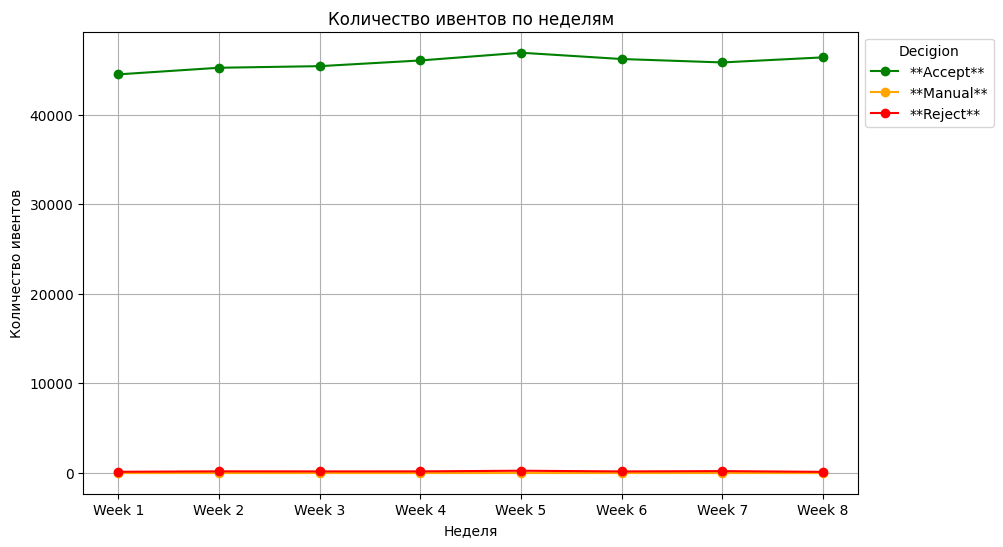

Week Week 1: Total - 44631
Week Week 2: Total - 45421
Week Week 3: Total - 45593
Week Week 4: Total - 46231
Week Week 5: Total - 47168
Week Week 6: Total - 46387
Week Week 7: Total - 46041
Week Week 8: Total - 46521


In [17]:
pivot_table.T.plot(kind='line', marker='o', figsize=(10, 6), color=['Green', 'orange', 'red'])
#pivot_table.T.plot(kind='bar', figsize=(10, 6), color=['Green', 'orange', 'red'])
plt.title('Количество ивентов по неделям')
plt.xlabel('Неделя')
plt.ylabel('Количество ивентов')
plt.legend(title='Decigion',bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show() 
grouped_df = df.groupby('Unnamed: 0').sum()
for week, total_events in grouped_df.sum(axis=0).items():
    print(f'Week {week}: Total - {total_events}')

In [14]:
percentage_df = (pivot_table / pivot_table.sum()) * 100
print(percentage_df)

               Week 1     Week 2     Week 3     Week 4     Week 5     Week 6  \
Unnamed: 0                                                                     
**Accept**  99.766978  99.656547  99.673195  99.673379  99.527222  99.687412   
**Manual**   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
**Reject**   0.233022   0.343453   0.326805   0.326621   0.472778   0.312588   

             Week 7     Week 8  
Unnamed: 0                      
**Accept**  99.6047  99.793642  
**Manual**   0.0000   0.000000  
**Reject**   0.3953   0.206358  


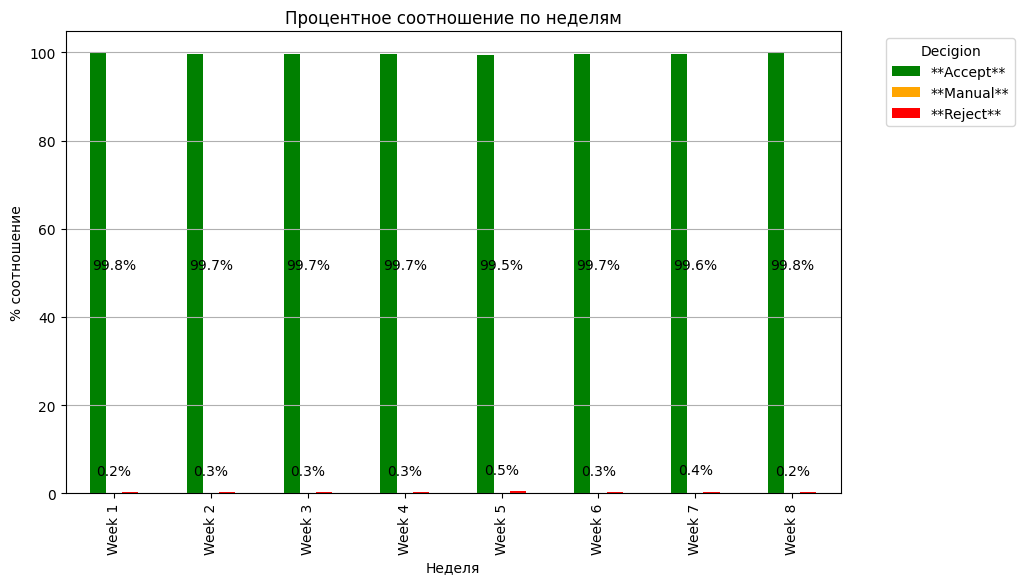

In [15]:
ax = percentage_df.T.plot(kind='bar', stacked=False, figsize=(10, 6),
color=['Green', 'orange', 'red']) 
plt.title('Процентное соотношение по неделям')
plt.xlabel('Неделя')
plt.ylabel('% соотношение')
plt.legend(title='Decigion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')

for i, col in enumerate(percentage_df.columns):
    for j, value in enumerate(percentage_df[col]):
        if not pd.isna(value) and value > 0: 
            plt.text(i, value / 2 + 2 + j * 1.5, f'{value:.1f}%', ha='center', va='center', color='black')
plt.show()

Week Week 1: Total - 44631
Week Week 2: Total - 45421
Week Week 3: Total - 45593
Week Week 4: Total - 46231
Week Week 5: Total - 47168
Week Week 6: Total - 46387
Week Week 7: Total - 46041
Week Week 8: Total - 46521


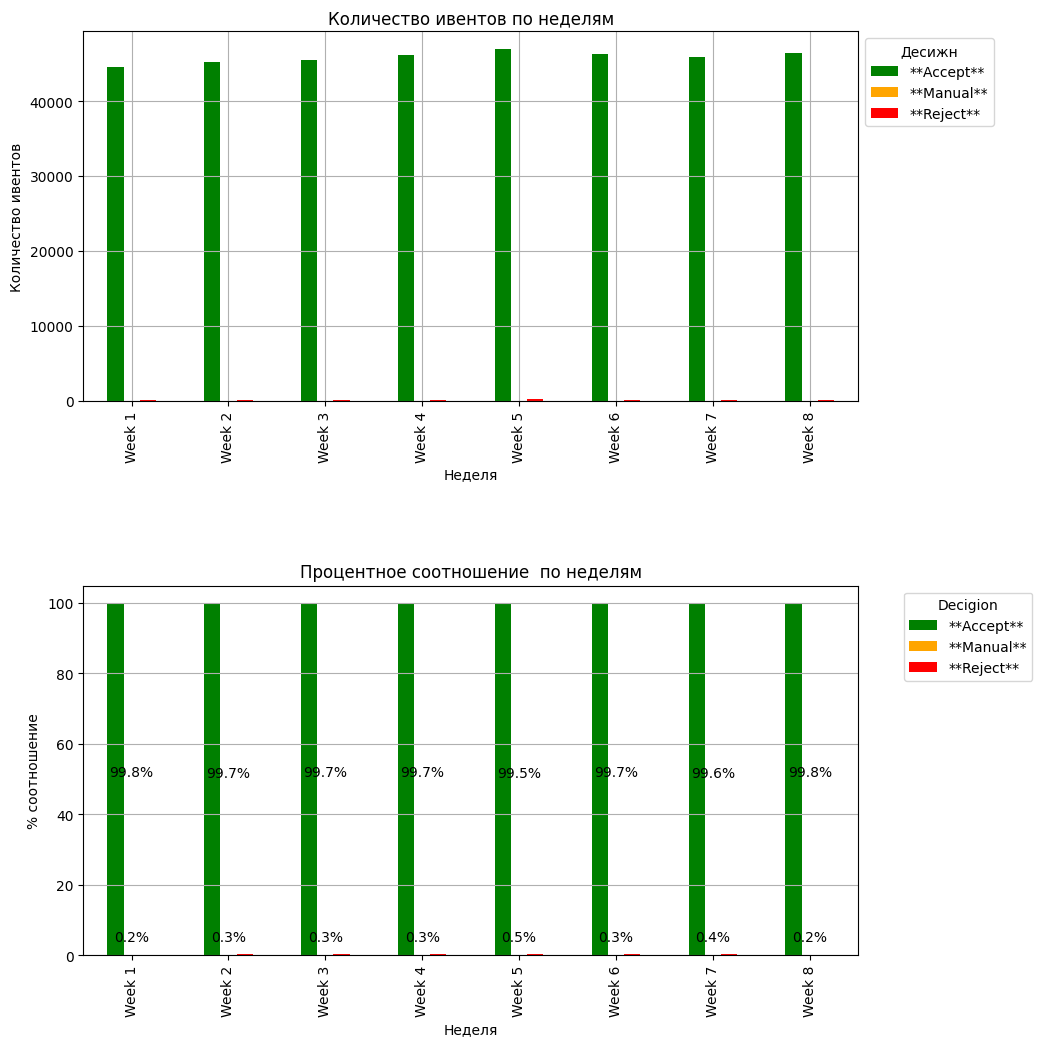

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,12))  
plt.subplots_adjust(wspace=0.5, hspace=0.5)

pivot_table.T.plot(kind='bar', ax=axes[0], color=['Green', 'orange', 'red'])
axes[0].set_title('Количество ивентов по неделям')
axes[0].set_xlabel('Неделя')
axes[0].set_ylabel('Количество ивентов')
axes[0].legend(title='Десижн', bbox_to_anchor=(1, 1), loc='upper left')
axes[0].grid(True)
grouped_df = df.groupby('Unnamed: 0').sum()
for week, total_events in grouped_df.sum(axis=0).items():
    print(f'Week {week}: Total - {total_events}')

percentage_df.T.plot(kind='bar', stacked=False, ax=axes[1], color=['Green', 'orange', 'red']) 

axes[1].set_title('Процентное соотношение  по неделям')
axes[1].set_xlabel('Неделя')
axes[1].set_ylabel('% соотношение')
axes[1].legend(title='Decigion', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y')

for i, col in enumerate(percentage_df.columns):
    for j, value in enumerate(percentage_df[col]):
        if not pd.isna(value) and value > 0: 
            axes[1].text(i, value / 2 + 2 + j * 1.5, f'{value:.1f}%', ha='center', va='center', color='black')

plt.show()